In [48]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [9]:
# load data
inp = pd.read_csv("VTINP16_upd.TXT")
outp = pd.read_csv("VTOUTP16.TXT")
ed = pd.read_csv("VTED16.TXT")
rev = pd.read_csv("VTREVCODE16.TXT")

In [10]:
# question 3
ed.head()

,hnum2,ATYPE,asour,intage,TXTZIP,sex,dstat,PPAY,CHRGS,DX1,...,BTYPE,ERFLAG,cah,vtres,OBSFLAG,AFLAG,UNIQ,ADMID_QTR,DISCD_QTR,CHRGS_HCIA
0,11,1,3,14,OTH-NH,2,1,1,14417.6,I130,...,117,1,1,3,0,0,443,1,1,14417.6
1,11,1,3,14,050,1,1,1,13557.5,I5033,...,111,1,1,1,0,0,447,1,1,13557.5
2,11,1,3,14,050,2,1,1,12657.3,K922,...,111,1,1,1,0,0,454,1,1,12657.3
3,11,1,3,12,050,1,8,1,11886.8,C3490,...,111,1,1,1,0,0,568,1,1,11886.8
4,11,1,3,10,050,1,5,1,14101.5,K852,...,111,1,1,1,0,0,777,1,1,14101.5


In [15]:
# find overdose
def find_overdose(x):
    for index in x.index:
        if re.search('T4[0-3]+.+', x[index]):
            return True
        else:
            continue
    return False  

def find_narcotics(x):
    for index in x.index:
        if re.search('(T404.+)|(T4362.+)', x[index]):
            return True
        else:
            continue
    return False  

In [16]:
overdose = ed.loc[:, [f'DX{i+1}' for i in range(20)]].apply(lambda x: find_overdose(x), axis=1)
narcotics = ed.loc[:, [f'DX{i+1}' for i in range(20)]].apply(lambda x: find_narcotics(x), axis=1)

In [17]:
ed['overdose'] = overdue.astype(int)
ed['narcotics'] = narcotics.astype(int)

In [18]:
ed.to_csv('ed_withbool.csv', index=False)

In [20]:
# Tens of millions of dollars reportedly were spent on drug use related cases that year alone. 
# Can you find the exact dollar amount for your identified patients in this question? 
# Of the three insurances in Question 2, what was share of each of the total payments? 

In [29]:
# money spent on drug use related cases
round(sum(ed[ed['overdose'] == 1]['CHRGS'].astype(float)),2)

30741219.53

In [44]:
# share of each insurance of the total payments
identified = ed[ed['overdose'] == 1]
medicare = identified[identified['PPAY'] == 1]
medicaid = identified[identified['PPAY'] == 2]
commercial = identified[(identified['PPAY'] == 6) | (identified['PPAY'] == 7)]

In [45]:
round(sum(medicare['CHRGS'].astype(float)),2)

17237917.63

In [46]:
round(sum(medicaid['CHRGS'].astype(float)),2)

6713846.42

In [47]:
round(sum(commercial['CHRGS'].astype(float)),2)

5777497.88

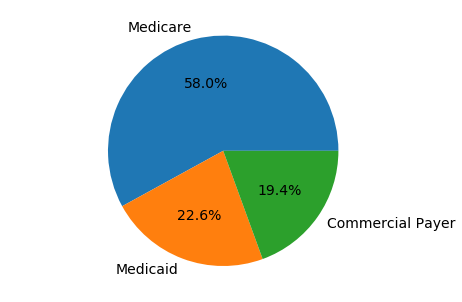

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
payers = ['Medicare', 'Medicaid', 'Commercial Payer']
shares = [round(sum(medicare['CHRGS'].astype(float)),2),
            round(sum(medicaid['CHRGS'].astype(float)),2),
            round(sum(commercial['CHRGS'].astype(float)),2)]
ax.pie(shares, labels = payers, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

In [43]:
# Use the ICD-10 codes of T404xxx and T4362xx to identify only a small sample of such patients. 
# How many of patients have been brought to ED for diagnosis related to synthetic narcotics or amphetamines? 

In [57]:
identified[identified['narcotics'] == 1].count
#156

<bound method DataFrame.count of         hnum2  ATYPE asour  intage TXTZIP sex  dstat  PPAY    CHRGS      DX1  \
430         5      1     1       3    129   1      5     6    17641  T43622A   
494         5      1     3       6  05401   1      5     1  26394.2  T43621A   
990         6      1     3       5  05602   2      4     2  22617.2    M6282   
1470        5      1     3      10    054   1      6     6  11351.3      G92   
1482        5      1     4      10  05478   1      6     2  17070.7  T85528A   
...       ...    ...   ...     ...    ...  ..    ...   ...      ...      ...   
254060     12      1     3      14    051   2     12     1  2696.35     R410   
255395      5      1     3       3    054   2      5     7  5199.35  T43622A   
262198      5      1     3       2  05452   1      4    11  4468.86  T43622A   
263500      5      1     3       3  05401   2      5     7   2292.4  T43621A   
263620      5      1     3       8  05401   2      5     2  2411.65  T43621A   

      